As the sample size increses, the difference between biased variance and unbaised variance decreases

In [ ]:
import numpy as np
n = 10
a = np.random.random(n)
biased_variance = (1/(n)) * ((a-a.mean()) ** 2).sum()
unbiased_variance = (1/(n-1)) * ((a-a.mean()) ** 2).sum()

In [ ]:
print(biased_variance)
print(unbiased_variance)

0.10214114603471879
0.11349016226079864


In [ ]:
n = 1000
a = np.random.random(n)
biased_variance = (1/(n)) * ((a-a.mean()) ** 2).sum()
unbiased_variance = (1/(n-1)) * ((a-a.mean()) ** 2).sum()

In [ ]:
print(biased_variance)
print(unbiased_variance)

0.08646663844387012
0.08655319163550564


In [ ]:
n = 10000
a = np.random.random(n)
biased_variance = (1/(n)) * ((a-a.mean()) ** 2).sum()
unbiased_variance = (1/(n-1)) * ((a-a.mean()) ** 2).sum()

In [ ]:
print(biased_variance)
print(unbiased_variance)

0.08329204705333133
0.08330037709104043


## Using Quantiles

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
d = np.load("/content/exams.npy")
p = d[:, 0].astype("uint32")
q = np.quantile(p, [0.0, 0.25, 0.5, 0.75, 1.0])


print()
print("Quartiles: ", q)
print()
print("Counts by quartile")
print("   %d" % ((q[0] <= p) & (p < q[1])).sum())
print("   %d" % ((q[1] <= p) & (p < q[2])).sum())
print("   %d" % ((q[2] <= p) & (p < q[3])).sum())
print("   %d" % ((q[3] <= p) & (p < q[4])).sum())



Quartiles:  [ 18.    56.75  68.    78.   100.  ]

Counts by quartile
   250
   237
   253
   248


In [ ]:
d[:5, 0]

array([55., 63., 65., 37., 74.])

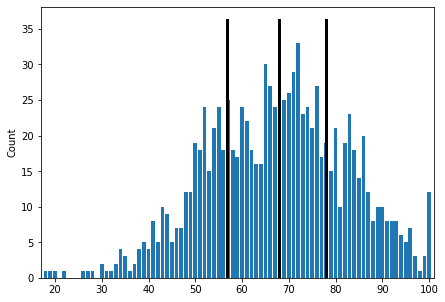

In [ ]:
h = np.bincount(p, minlength=100)
x = np.arange(101)
plt.bar(x, h, width=0.8*(x[1]-x[0]))
n = 1.1*h.max()
plt.plot([q[1], q[1]], [0, n], linewidth=3, color='k')
plt.plot([q[2], q[2]], [0, n], linewidth=3, color='k')
plt.plot([q[3], q[3]], [0, n], linewidth=3, color='k')
plt.xlim((p.min()-1, p.max()+1))
plt.ylabel("Count")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
# plt.savefig("quantiles_plot.png", dpi=300)
plt.show()
# plt.close()

In [ ]:
print(x[1])
print(x[0])

1
0


In [ ]:
np.arange(101)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

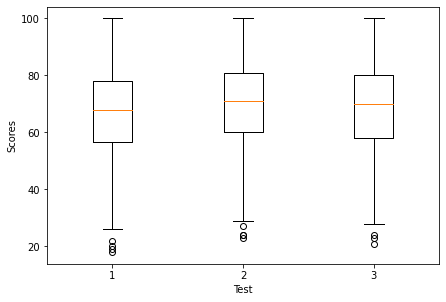

In [ ]:
# box plot 
plt.boxplot(d)
plt.xlabel("Test")
plt.ylabel("Scores")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
# plt.savefig("box_plot.png", dpi=300)
plt.show()
# plt.close()

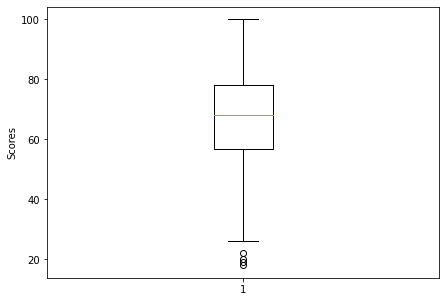

In [ ]:
plt.boxplot(p)
plt.ylabel("Scores")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
# plt.savefig("box_plot1.png", dpi= 300)
plt.show()
# plt.close()

## Missing Values

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
a = np.arange(10, dtype="float64")
a

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [ ]:
a[5] = np.nan
np.isnan(a[5]) 


True

In [ ]:
a[5] == np.nan

False

In [ ]:
a[5] is np.nan

False

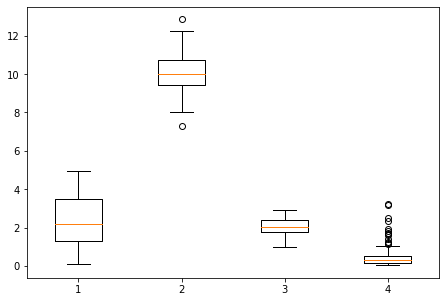

In [ ]:
N = 100
np.random.seed(73939133)
x = np.zeros((N, 4))
x[:, 0] = 5 * np.random.random(N)
x[:, 1] = np.random.normal(10, 1, size=N)
x[:, 2] = 3 * np.random.beta(5, 2, N)
x[:, 3] = 0.3 * np.random.lognormal(size=N)

plt.boxplot(x)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()
# plt.savefit("missing_box_plot.png", dpi=300)
# plt.close()

In [ ]:
# Make 5% of the values NAN
np.random.seed(73939133)

i = np.random.randint(0, N, size=int(0.05*N))
x[i, 0] = np.nan
i = np.random.randint(0, N, size=int(0.05*N))
x[i, 1] = np.nan
i = np.random.randint(0, N, size=int(0.05*N))
x[i, 2] = np.nan
i = np.random.randint(0, N, size=int(0.05*N))
x[i, 3] = np.nan

NaNs present


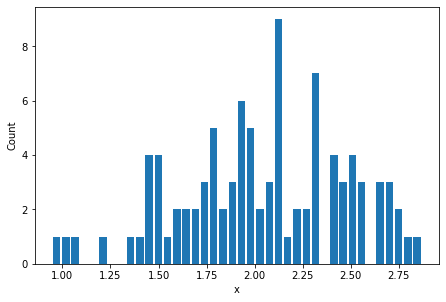

In [ ]:
# Do we have NaNs in feature 2?
if(np.isnan(x[:, 2]).sum() != 0):
  print("NaNs present")
  i = np.where(np.isnan(x[:, 2]) == False)
  z = x[i, 2]
  mn, md, s = z.mean(), np.median(z), z.std(ddof=1)
  hh, xx = np.histogram(z, bins=40)
  plt.bar(xx[:-1], hh, width=0.8*(xx[1]-xx[0]))
  plt.xlabel("x")
  plt.ylabel("Count")
  plt.tight_layout(pad=0, w_pad=0, h_pad=0)
  plt.show()
  # plt.savefit("missing_feature_2_plot.png", dpi=300)
  # plt.close()

In [ ]:
i = np.where(np.isnan(x[:, 2]) == True)
print(i)

(array([16, 59, 94, 96, 97]),)


In [ ]:
x[i,2]

array([[nan, nan, nan, nan, nan]])

non-Nan mean, std =  2.064587568137288 0.4321404138574721
updated mean, std =  2.065900271842645 0.4211256652595745


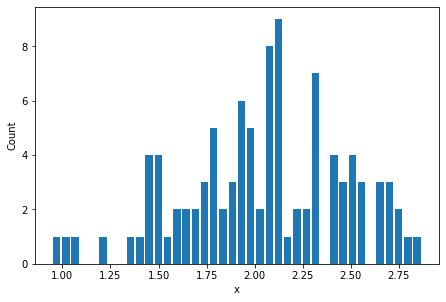

In [ ]:


print("non-Nan mean, std = ", z.mean(), z.std(ddof=1))
print("updated mean, std = ", x[:, 2].mean(), x[:, 2].std(ddof=1))

hh, xx = np.histogram(x[:, 2],  bins=40)
plt.bar(xx[:-1], hh, width = 0.8 * (xx[1] - xx[0]))
plt.xlabel("x")
plt.ylabel("Count")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

# plt.savefit("missing_feature_2_updated_plot.png", dpi=300)
# plt.close()



In [ ]:
# do the same with others
good_idx = np.where(np.isnan(x[:, 0]) == False)
m = np.median(x[good_idx, 0])
bad_idx = np.where(np.isnan(x[:, 0]) == True)
x[bad_idx, 0] = m

good_idx = np.where(np.isnan(x[:, 1]) == False)
m = np.median(x[good_idx, 1])
bad_idx = np.where(np.isnan(x[:, 1]) == True)
x[bad_idx, 1] = m

good_idx = np.where(np.isnan(x[:, 3]) == False)
m = np.median(x[good_idx, 3])
bad_idx = np.where(np.isnan(x[:, 3]) == True)
x[bad_idx, 3] = m


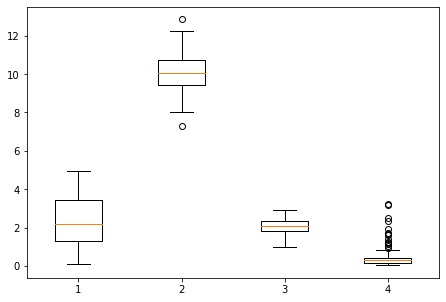

In [ ]:
plt.boxplot(x)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()
# plt.savefit("missing_update_box_plot.png", dpi=300)
# plt.close()

## Correlation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(8675309)

N = 100
x = np.linspace(0, 1, N) + (np.random.random(N) - 0.5)
y = np.random.random(N) * x
z = -0.1 * np.random.random(N)*x

In [ ]:
print(x)
print(y)
print(z)

[ 0.31245912  0.2611461  -0.12243146 -0.26740219 -0.05059483 -0.36737022
 -0.22440742 -0.015412   -0.40102454  0.26068566  0.20111351  0.53039327
 -0.03605961  0.1864928   0.35893464 -0.16985312  0.59072878  0.43323201
 -0.19793649  0.32759112 -0.17227025 -0.17455559  0.54348101  0.68943772
 -0.20156662  0.43146638 -0.14555018  0.62743354 -0.14487476  0.77477553
  0.69373662  0.20794274  0.17834131  0.57751433  0.07400327 -0.11141428
  0.75526185  0.45961951  0.04589426  0.70675591  0.67929252  0.44484954
  0.32735994 -0.05185545  0.49659441  0.10242908  0.61557639  0.77006253
  0.90098178  0.7179596   0.1496393   0.08213664  0.71036937  0.19528999
  0.79001132  0.6103903   0.43356075  1.01611532  0.39353825  0.37885225
  0.87835903  0.69838204  0.52661854  0.30528467  0.85784283  0.47356657
  1.14576795  0.40272775  1.10843673  0.92624655  0.84897998  0.38436518
  0.53827757  0.37249526  0.57255794  0.33664615  0.66849967  1.14836383
  0.82876692  1.06471669  0.33345306  0.82493151  0

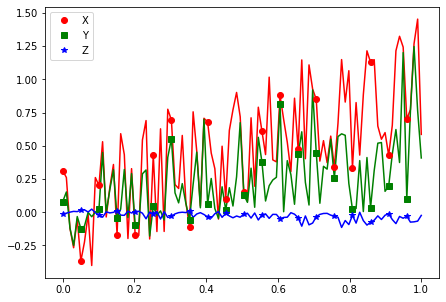

In [ ]:
plt.plot(np.linspace(0, 1, N), x, color='r')
plt.plot(np.linspace(0, 1, N), y, color='g')
plt.plot(np.linspace(0, 1, N), z, color='b')

plt.plot(np.linspace(0, 1, N)[::5], x[::5], color='r', marker="o", linestyle="none", label="X")
plt.plot(np.linspace(0, 1, N)[::5], y[::5], color='g', marker="s", linestyle="none", label="Y")
plt.plot(np.linspace(0, 1, N)[::5], z[::5], color='b', marker="*", linestyle="none", label="Z")

plt.legend(loc="upper left")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

# plt.savefig("correlation_scatter_plot.png", dpi=300)
# plt.close()


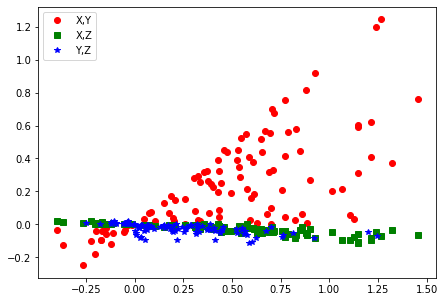

In [ ]:
plt.plot(x, y, marker='o', linestyle='none', color='r', label='X,Y')
plt.plot(x, z, marker='s', linestyle='none', color='g', label='X,Z')
plt.plot(y, z, marker='*', linestyle='none', color='b', label='Y,Z')
plt.legend(loc="upper left")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()

# plt.savefig("correlation_scatter_plot.png", dpi=300)
# plt.close()



In [ ]:
from scipy.stats import pearsonr, spearmanr
print("Pearson(x, y) : ", pearsonr(x, y)[0])
print("Spearman(x, y) : ", spearmanr(x, y)[0])
print()
print("Pearson(x, z) : ", pearsonr(x, z)[0])
print("Spearman(x, z) : ", spearmanr(x, z)[0])
print()
print("Pearson(y, z) : ", pearsonr(y, z)[0])
print("Spearman(y, z) : ", spearmanr(y, z)[0])
print()

Pearson(x, y) :  0.6828516550443248
Spearman(x, y) :  0.6940174017401739

Pearson(x, z) :  -0.8504746770227909
Spearman(x, z) :  -0.895085508550855

Pearson(y, z) :  -0.5653610370701884
Spearman(y, z) :  -0.6414041404140414



In [ ]:
def pearson(x, y):
  exy = (x*y).mean()
  ex = x.mean()
  ey = y.mean()
  exx = (x*x).mean()
  ex2 = x.mean() ** 2
  eyy = (y*y).mean()
  ey2 = y.mean()**2

  return (exy - ex * ey)/(np.sqrt(exx-ex2) * np.sqrt(eyy-ey2))

In [ ]:
print("Pearson(x,y): ", pearson(x, y))
print("Pearson(x, z): ", pearson(x, z))
print("Pearson(y, z): ", pearson(y, z))

Pearson(x,y):  0.6828516550443247
Pearson(x, z):  -0.8504746770227909
Pearson(y, z):  -0.5653610370701883


In [ ]:
d = np.vstack((x, y, z))
print(np.corrcoef(d))
print()

[[ 1.          0.68285166 -0.85047468]
 [ 0.68285166  1.         -0.56536104]
 [-0.85047468 -0.56536104  1.        ]]



In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
a = china[230, :, 1].astype("float64")
b = china[231, :, 1].astype("float64")
c = china[400, :, 1].astype("float64")
d = np.random.random(640)
print("china(a, b): ", pearson(a, b))
print("china(a, c): ", pearson(a, c))
print("china(a, d): ", pearson(a, d))
print()

china(a, b):  0.8979359541118713
china(a, c):  -0.276082058438271
china(a, d):  -0.06717496519306748



In [ ]:
# Spearman

def spearman(x, y):
  n = len(x)
  t = x[np.argsort(x)]
  rx = []
  for i in range(n):
    rx.append(np.where(x[i] == t)[0][0])
  rx = np.array(rx, dtype="float64")
  t = y[np.argsort(y)]
  ry = []
  for i in range(n):
    ry.append(np.where(y[i] == t)[0][0])
  ry = np.array(ry, dtype="float64")
  d = rx - ry
  return 1.0 - (6.0/(n*(n*n-1))) * (d**2).sum()


In [ ]:
print(spearman(x, y), spearmanr(x, y)[0])
print(spearman(x, z), spearmanr(x, z)[0])
print(spearman(y, z), spearmanr(y, z)[0])

0.694017401740174 0.6940174017401739
-0.8950855085508551 -0.895085508550855
-0.6414041404140414 -0.6414041404140414


In [ ]:
# correlation between linear ramp and sigmoid functions
ramp = np.linspace(-20, 20, 1000)
sig = 1.0 / (1.0 + np.exp(-a))
print(pearson(ramp, sig))
print(spearman(ramp, sig))

0.9053277293366915
1.0


In [ ]:
s = np.array([3, 1, 4, 2])
np.argsort(s)


array([1, 3, 0, 2])

In [ ]:
np.sort(s)

array([1, 2, 3, 4])

In [ ]:
s[np.argsort(s)]

array([1, 2, 3, 4])

In [ ]:
l = s[np.argsort(s)]

In [ ]:
for i in range(len(s)):
  np.where(s[i] == l)
  print(s[i], l)

3 [1 2 3 4]
1 [1 2 3 4]
4 [1 2 3 4]
2 [1 2 3 4]


In [ ]:
sx = []
for i in range(len(s)):
  sx.append(np.where(s[i] == l))
  print(sx)

[(array([2]),)]
[(array([2]),), (array([0]),)]
[(array([2]),), (array([0]),), (array([3]),)]
[(array([2]),), (array([0]),), (array([3]),), (array([1]),)]


In [ ]:
print(sx[0])

(array([2]),)


## **Hypothesis**

In [1]:
import numpy as np
import matplotlib.pylab as plt

In [2]:
np.random.seed(65535)
a = np.random.normal(85, 6, 50).astype('int32')
a[np.where(a > 100)] = 100
b = np.random.normal(82, 7, 50).astype("int32")
b[np.where(b > 100)] = 100

In [3]:
print(a)
print()
print(b)
print()

[ 81  80  85  87  83  87 100  90  79  83  88  75  87  92  78  80  83  91
  82  88  89  92  97  82  79  82  82  85  89  91  83  85  77  81  90  87
  82  84  86  79  84  85  90  84  90  85  85  78  94  87]

[92 82 78 74 86 69 83 67 85 82 81 91 79 82 82 88 80 63 85 86 77 94 85 75
 77 89 86 71 82 82 80 88 72 91 90 92 95 87 71 83 94 90 78 60 76 88 91 83
 85 73]



In [4]:
print("With means of 82 & 85: ")
from scipy.stats import ttest_ind
t, p = ttest_ind(a, b, equal_var=False)
print("(t=%0.5f, p=%0.5f)" %(t, p))

With means of 82 & 85: 
(t=2.40234, p=0.01852)


In [5]:
from scipy.stats import mannwhitneyu
u, p = mannwhitneyu(a, b)
print("(U=%0.5f, P=%0.5f)" %(u, p))

(U=997.00000, P=0.04058)


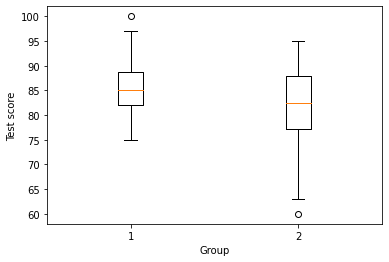

In [6]:
plt.boxplot((a, b))
plt.xlabel("Group")
plt.ylabel("Test score")
plt.show()
# plt.savefig("hypothesis_box_plot.png", dpi=300)
# plt.close()

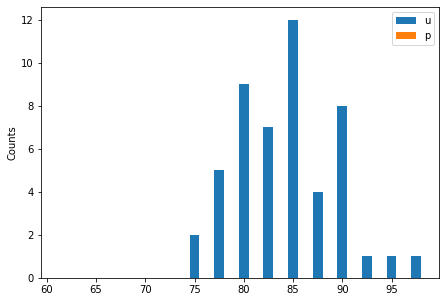

In [7]:
h, x = np.histogram(a, bins=10)
plt.bar(x[:-1], h, width=0.4*(x[1]-x[0]), label="Group A")
h, y = np.histogram(b, bins=10)
plt.bar(y[:-1] + (x[1]-x[0])/2, h, width=0.4*(x[1]-x[1]), label="Group B")
plt.legend("upper left")
plt.ylabel("Counts")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()
# plt.savefig("hypothesis_bar_plot.png", dpi=300)
# plt.close()

In [8]:
# CI for Welch's t-test
from scipy import stats

def CI(a, b, alpha=0.5):
  n1, n2 = len(a), len(b)
  s1, s2 = np.std(a, ddof=1)**2, np.std(b, ddof=1)**2
  df = (s1/n1 + s2/n2)**2 / ((s1/n1)**2/(n1-1) + (s2/n2)**2/(n2-1))
  tc = stats.t.ppf(1- alpha/2, df)
  lo = (a.mean() - b.mean()) - tc*np.sqrt(s1/n1 + s2/n2)
  hi = (a.mean() - b.mean()) + tc*np.sqrt(s1/n1 + s2/n2)
  return lo, hi

In [9]:
lo, hi = CI(a, b)
print("C195 = (%0.5f, %0.5f)" % (lo, hi))

C195 = (2.34069, 4.17931)


In [10]:
# Cohen's d
def Cohen_d(a, b):
  s1 = np.std(a, ddof=1)**2
  s2 = np.std(b, ddof=1)**2
  return (a.mean() - b.mean()) / np.sqrt(0.5*(s1+s2))

In [11]:
print("Cohen's d = %0.5f" % Cohen_d(a, b))

Cohen's d = 0.48047


In [12]:
# Change the means to one step closer
np.random.seed(65535)
a = np.random.normal(85, 6, 50).astype('int32')
a[np.where(a > 100)] = 100
b = np.random.normal(83, 7, 50).astype("int32")
b[np.where(b > 100)] = 100

In [13]:
print("With means of 81 & 85: ")
t, p = ttest_ind(a, b, equal_var=False)
print("(t=%0.5f, p=%0.5f)" % (t, p))
u, p = mannwhitneyu(a, b)
print("(U=%0.5f, P=%0.5f)" % (u, p))


With means of 81 & 85: 
(t=1.66543, p=0.09959)
(U=1104.50000, P=0.15839)


In [15]:
# Effect of sample size 
np.random.seed(65535)
pt = []
et = []
pm = []
em = []
M = 25
n = [20,40,60,80,100,120,140,160,180,200,250,300,350,400,450,500,750,1000]
for i in n:
  p = []
  t = []
  for j in range(M):
    a = np.random.normal(85, 6, i).astype("int32")
    a[np.where(a > 100)] = 100
    b = np.random.normal(84, 7, i).astype("int32")
    b[np.where(b > 100)] = 100
    t.append(ttest_ind(a, b, equal_var=False)[1])
    p.append(mannwhitneyu(a, b)[1])
  pt.append(np.array(t).mean())
  et.append(np.array(t).std(ddof=1)/np.sqrt(M))
  pm.append(np.array(p).mean())
  em.append(np.array(p).std(ddof=1)/np.sqrt(M))
  if (i==1000):
    print("n=1000 Cohen's d = %0.5f" % Cohen_d(a, b))


n=1000 Cohen's d = 0.12731


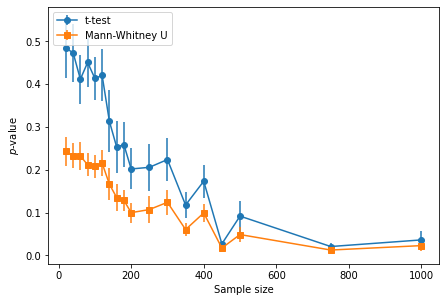

In [17]:
pt = np.array(pt)
pm = np.array(pm)
et = np.array(et)
em = np.array(em)

plt.errorbar(n, pt, et, marker='o', label='t-test')
plt.errorbar(n, pm, em, marker='s', label='Mann-Whitney U')
plt.xlabel('Sample size')
plt.ylabel("$p$-value")
plt.legend(loc="upper left")
plt.tight_layout(pad=0, w_pad=0, h_pad=0)
plt.show()
# plt.savefig("hypothesis_pvalue_plot.png", dpi=300)
# plt.close()